In [1]:
# !pip install -q -U einops datasets matplotlib tqdm


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from datasets import load_dataset
from PIL import Image
import io
import os

In [3]:
dataset_dog = load_dataset("BirdL/DALL-E-Dogs")
dataset_dog = dataset_dog.rename_column('Images', 'image')
dataset_dog.save_to_disk("datasetBirdL")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1104 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1104 [00:00<?, ? examples/s]

In [8]:
dataset_dog

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 1104
    })
})

In [12]:
os.makedirs('dataset_dogs', exist_ok=True)

# Iterate over the 'train' data
for i, example in enumerate(dataset_dog['train']):
  # Convert the image data to a bytes-like object
  img_byte_arr = io.BytesIO()
  example['image'].save(img_byte_arr, format='PNG')
  img_byte_arr = img_byte_arr.getvalue()

  # Convert the bytes-like object to a PIL image
  image = Image.open(io.BytesIO(img_byte_arr))

  # Save the image
  image.save(f'dataset_dogs/image_{i}.png')

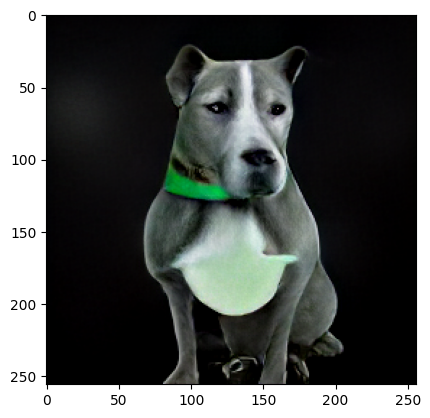

In [10]:
import numpy as np

# Get the first image from the dataset
first_image = dataset_dog['train'][90]['image']

# Convert the PIL Image to a numpy array
first_image = np.array(first_image)

# Display the image
plt.imshow(first_image)
plt.show()